In [1]:
#import os
#from google.colab import drive
#drive.mount("/gdrive/")
#os.chdir("/gdrive/My Drive/FMA_Project/Jonathan")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive/


# Import Packages and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import os

# Fetch Audio Path

In [ ]:
def fetch_audio_path(audio_dir, trackid):
    trackid_name = '{:06d}'.format(trackid)
    return os.path.join(audio_dir, trackid_name[:3], trackid_name + '.mp3')

# Fetch Track ID from Directory

In [ ]:
def fetch_trackID_from_dir(audio_dir):
    trackid = []
    for _, dir_name, files in os.walk(audio_dir):
        if dir_name == []:
            trackid.extend(int(file[:-4]) for file in files)
    return trackid

# Load Metadata and Track Path

In [ ]:
audio_dir = 'Dataset/fma_small'
trackid = fetch_trackID_from_dir(audio_dir)

In [ ]:
filepath = 'Dataset/fma_metadata/tracks.csv'
tracks = pd.read_csv(filepath, index_col = 0, header = [0, 1])
tracks.head(10)

album                       ... track                     
         comments         date_created  ...  tags                title
track_id                                ...                           
2               0  2008-11-26 01:44:45  ...    []                 Food
3               0  2008-11-26 01:44:45  ...    []         Electric Ave
5               0  2008-11-26 01:44:45  ...    []           This World
10              0  2008-11-26 01:45:08  ...    []              Freeway
20              0  2008-11-26 01:45:05  ...    []      Spiritual Level
26              0  2008-11-26 01:45:05  ...    []  Where is your Love?
30              0  2008-11-26 01:45:05  ...    []            Too Happy
46              0  2008-11-26 01:45:05  ...    []             Yosemite
48              0  2008-11-26 01:45:05  ...    []       Light of Light
134             0  2008-11-26 01:44:45  ...    []         Street Music

[10 rows x 52 columns]

# Removing Unwanted Columns

In [ ]:
keep_cols = [('set', 'subset'),('track', 'genre_top')]
df= tracks[keep_cols]
df= df[df[('set', 'subset')] == 'small']
df['track_id'] = df.index
df.head(10)

,set,track,track_id
,subset,genre_top,
track_id,,,
2,small,Hip-Hop,2
5,small,Hip-Hop,5
10,small,Pop,10
140,small,Folk,140
141,small,Folk,141
148,small,Experimental,148
182,small,Rock,182
190,small,Folk,190


# Get Distribution of all Genres



In [ ]:
from collections import Counter
genre_count = Counter(df[('track', 'genre_top')].values)
songs_summary = pd.DataFrame({"label":list(genre_count.keys()), "length":list(genre_count.values())})
songs_summary

,label,length
0,Hip-Hop,1000
1,Pop,1000
2,Folk,1000
3,Experimental,1000
4,Rock,1000
5,International,1000
6,Electronic,1000
7,Instrumental,1000


In [ ]:
classes = list(np.unique(songs_summary.label))
class_dist = songs_summary.groupby(['label'])['length'].mean()

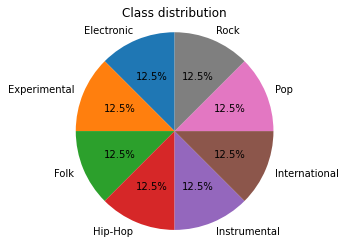

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Class distribution', y=1.00)
ax.pie(class_dist, labels = class_dist.index, autopct='%1.1f%%', shadow = False, startangle = 90)  
ax.axis('equal') #for circle
plt.show()

In [ ]:
grouped_df = df.groupby(('track', 'genre_top')).first().reset_index()
grouped_df.head(10)

,track,set,track_id
,genre_top,subset,
0,Electronic,small,1482
1,Experimental,small,148
2,Folk,small,140
3,Hip-Hop,small,2
4,Instrumental,small,10250
5,International,small,666
6,Pop,small,10
7,Rock,small,182


# Visualization of Mel Spectrogram for each Genre

In [ ]:
def generate_spectrogram(trackid, genre):
    filename = fetch_audio_path(audio_dir, trackid)
    y, sr = librosa.load(filename)
    print(len(y),sr)
    spectro = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = 2048, hop_length = 1024)
    spectro = librosa.power_to_db(spectro, ref = np.max)
    print(spectro.shape, genre)
    plt.figure(figsize = (10, 4))
    librosa.display.specshow(spectro, y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.title(str(genre))
    plt.show()

660984 22050
(128, 646) Electronic


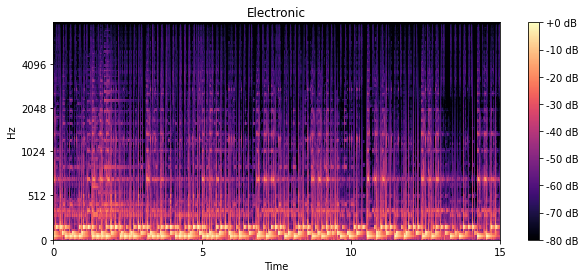

660984 22050
(128, 646) Experimental


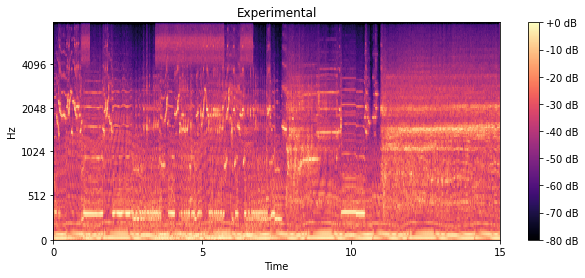

660984 22050
(128, 646) Folk


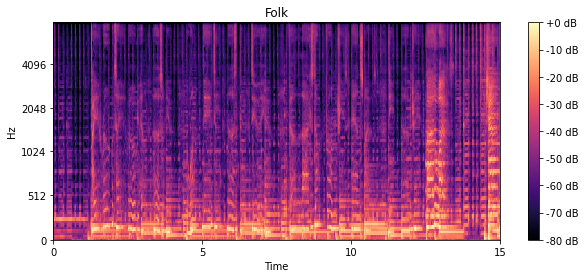

660984 22050
(128, 646) Hip-Hop


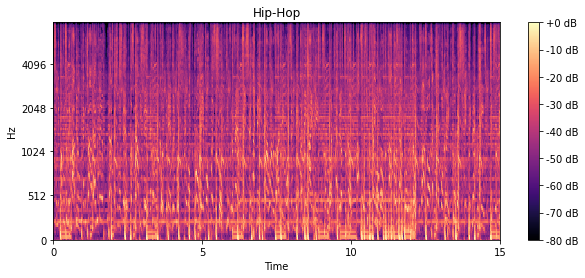

660984 22050
(128, 646) Instrumental


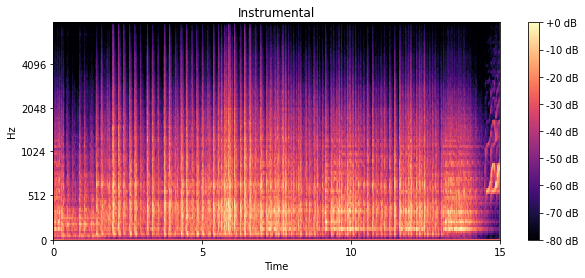

661560 22050
(128, 647) International


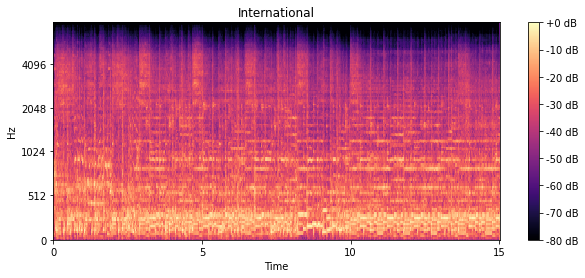

660984 22050
(128, 646) Pop


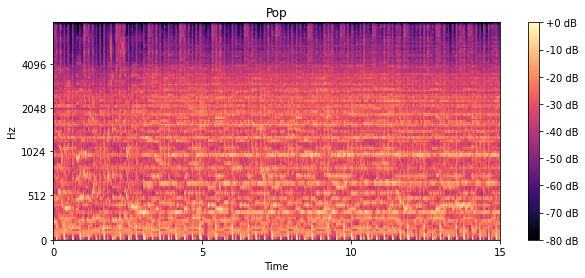

661560 22050
(128, 647) Rock


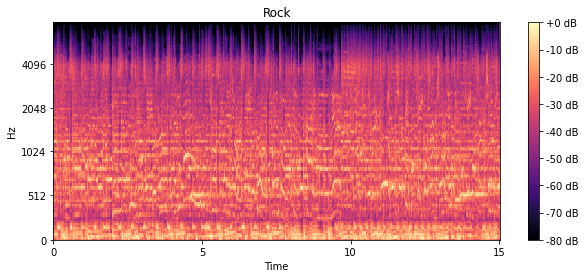

In [ ]:
for idx, row in grouped_df.iterrows():
    trackid = int(row['track_id'])
    genre = row[('track', 'genre_top')]
    generate_spectrogram(trackid, genre)